In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [3]:
gld=pd.read_csv("gld_price_data.csv")
gld.head(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
gld.shape

(2290, 6)

In [5]:
gld.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [6]:
gld.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [7]:
gld.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [8]:
correlation=gld.corr()

<AxesSubplot:>

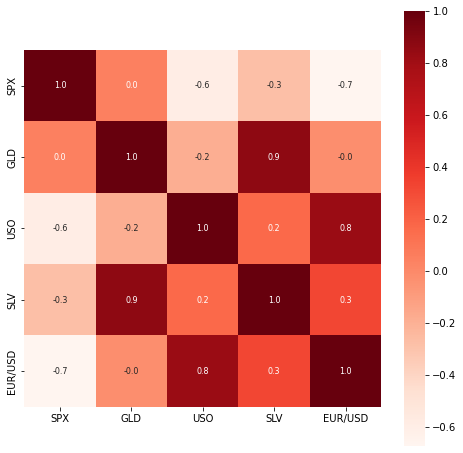

In [20]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Reds')

In [23]:
print(correlation["GLD"])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


C:\Users\88019\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='GLD', ylabel='Density'>

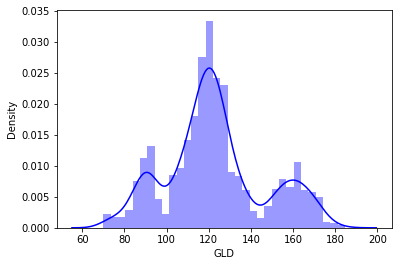

In [25]:
sns.distplot(gld['GLD'],color='Blue')

In [27]:
x=gld.drop(["Date","GLD"],axis=1)
y=gld['GLD']

In [28]:
x

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [29]:
y

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [31]:
regressor=RandomForestRegressor(n_estimators=100)

In [32]:
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [33]:
test_data_prediction=regressor.predict(x_test)

In [34]:
print(test_data_prediction)

[168.47349935  81.95179981 116.04619981 127.58980063 120.78190135
 154.78769762 150.30739868 125.9902006  117.64339845 126.06990023
 116.69640062 171.03390057 141.3681986  167.94869868 115.10239988
 117.51430011 138.61670334 169.92720097 159.6911037  157.85670019
 155.0815998  125.21740033 176.1932995  157.10250398 125.13450038
  93.86449987  77.38990004 120.50809998 119.1434995  167.53120002
  88.23510047 125.35030005  91.11000077 117.55960021 121.03839915
 135.93160112 115.36200123 115.45140037 146.67169965 107.05030064
 104.48110236  87.34139812 126.55240105 117.96300049 153.90029941
 119.49719994 108.3105003  108.21649776  93.10570031 126.94849818
  74.86630052 113.60629939 121.5091003  111.3703988  119.0295991
 120.80909942 157.76640006 167.83730164 147.11169674  85.76759867
  94.2525003   86.75969906  90.59520015 118.96970093 126.37800068
 127.4927004  170.8403005  122.02349905 117.52319891  98.66730026
 168.43360138 143.1169988  132.21400232 121.22490202 121.08039936
 119.784500

In [36]:
error_score=metrics.r2_score(y_test,test_data_prediction)
print("R squared error :", error_score)

R squared error : 0.9890550930222274


In [37]:
y_test=list(y_test)

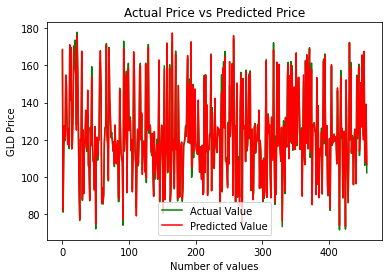

In [39]:
plt.plot(y_test,color='green',label="Actual Value")
plt.plot(test_data_prediction,color='red',label="Predicted Value")
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()